# Fashion-MNIST-Class
In this case a NN is built using pytorch to define a class for the architecture but not using the functional module. It is the most general way to define a model.

### Importing the libraries and loading the data

In [0]:
# Importing libraries
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import helper
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

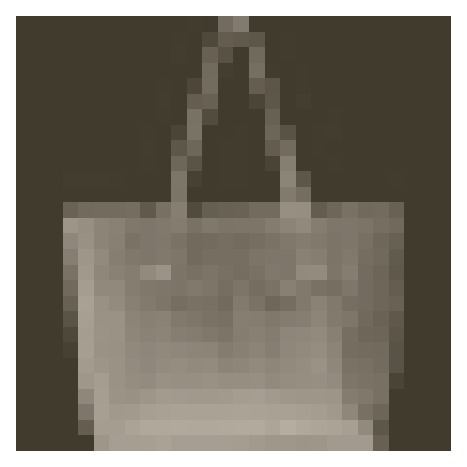

In [25]:
#Viewing the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

### Defining the architecture of the network 

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()        
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.output(x)
        #x = self.sigmoid(x)
        x = self.softmax(x)        
        return x
# Define the loss and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

### Train the network

In [27]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training
        images, labels = next(iter(trainloader))
        images.resize_(64, 784)
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        # Forward pass, then backward pass, then update weights
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()        
        # Take an update step and few the new weights
        optimizer.step()        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: -0.10733602214247179
Training loss: -0.15794237313081205
Training loss: -0.28171773046763465
Training loss: -0.3685402595030982
Training loss: -0.45687260794868345


### Forward test data to calculate accuracy

In [28]:
#Forward pass with 1 batch of images from the test dataset
images, labels = next(iter(testloader))
images.resize_(64, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    ps1 = model(images)
# Get the class probabilities
ps = torch.exp(ps1)
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)



#Forward pass with 1 batch of images from the test dataset
#images, labels = next(iter(testloader))
#images.resize_(64, 784)
# Get the class probabilities
#ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
#print(ps.shape)

torch.Size([64, 10])


In [29]:
#To obtain the class with the highest probability using method ps.topk
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[4],
        [8],
        [9],
        [4],
        [1],
        [4],
        [1],
        [1],
        [8],
        [7]])


In [0]:
# Now we want to check that the class obtained in the probabilities with the model correspond to the labels
# It can be done equationg top_class=labels but we need to be sure that they are the same shape.
# Equals must have the size (64,64)
equals = top_class == labels.view(*top_class.shape)

In [31]:
#To get the accuracy. 
#Equals is in the form of 0s and 1s, so the total sum divided by the total size of items gives the accuracy.
#Accuracy is a mean of how much the model got right
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 48.4375%
